# Regression Lab

# 1) Machine learning types

<img src="../img/Figure%201.6.jpg" align="middle" alt="Figure 1.6">

# 2) Machine learning applications

<img src="../img/Figure%201.7.png" style="width:70%;height:70%" align="middle" alt="Figure 1.7">

# 3) Choosing the right technique

<img src="../img/ml_map.png" style="width:90%;height:90%" align="middle" alt="ml_map">

# 4) Basic hands on

* I'm using a very small dataset of <b>student test scores</b> and <b>the amount of hours they studied.</b> 

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.8.png" style="width:50%;height:50%" align="middle" alt="Figure 1.8">

* Intuitively, we know that there must be a relationship right? The more you study, the better your test scores should be. 


* We're going to use <b><i>linear regression</i></b> to prove this relationship. 

## a. steps we are going to follow

1. Load Data
2. Initialization of the parameters
3. Define Linear Equation
4. Define and understand <b>Sum of Squared Error value</b> and <b>equation</b>
5. Calculate <b>Gradient Descent</b> in order to get the line of best fit

## b. linear Regression using Gradient Descent based optimization

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%20%201.9.gif" style="width:100%;height:100%" align="middle" alt="Figure 1.9">

## c. linear Equation

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.10.png" style="width:40%;height:40%" align="middle" alt="Figure 1.10">

## d. sum of squared error value and equation

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.11.png" style="width:50%;height:50%" align="middle" alt="Figure 1.11">

## e. sum of squared distance equation in statistics

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.12.png" style="width:40%;height:40%" align="middle" alt="Figure 1.12">

## f. sum of squared distances formula (to calculate our error) linear regression

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.13.png" style="width:40%;height:40%" align="middle" alt="Figure 1.13">
    

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.14.png" style="width:80%;height:80%" align="middle" alt="Figure 1.14">
    

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.15.png" style="width:60%;height:60%" align="middle" alt="Figure 1.15">

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.16.png" style="width:70%;height:70%" align="middle" alt="Figure 1.16">
    
    

## g. partial derivative with respect to b and m (to perform gradient descent)

<img src="https://raw.githubusercontent.com/jalajthanaki/Linear-Regression-Workshop/master/image/Figure%201.17.png" style="width:40%;height:40%" align="middle" alt="Figure 1.17">
    

In [5]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
# here we are calculating the sum of squared error by using the equation which we have seen.
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # Here we are coding up out partial derivatives equations and
        # generate the updated value for m and b to get the local minima
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    # we are multiplying the b_gradient and m_gradient with learningrate
    # so it is important to choose ideal learning rate if we make it to high then our model learn nothing
    # if we make it to small then our training is to slow and there are the chances of over fitting
    # so learning rate is important hyper parameter.
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        # we are using step_gradient function to calculate the actual partial derivatives for error function
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    # Step 1 : Read data

    # genfromtext is used to read out data from data.csv file.
    points = genfromtxt("../data/data1.csv", delimiter=",")

    # Step2 : Define certain hyperparameters

    # how fast our model will converge means how fast we will get the line of best fit.
    # Converge means how fast our ML model get the optimal line of best fit.
    learning_rate = 0.0001
    # Here we need to draw the line which is best fit for our data.
    # so we are using y = mx + b ( x and y are points; m is slop; b is the y intercept)
    # for initial y-intercept guess
    initial_b = 0
    # initial slope guess
    initial_m = 0
    # How much do you want to train the model?
    # Here data set is small so we iterate this model for 1000 times.
    num_iterations = 1000
    
    # Step 3 - print the values of b, m and all function which calculate gradient descent and errors
    # Here we are printing the initial values of b, m and error.
    # As well as there is the function compute_error_for_line_given_points()
    # which compute the errors for given point
    print ("Starting gradient descent at b = {0}, m = {1}, MSE = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")

    # By using this gradient_descent_runner() function we will actually calculate gradient descent
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

    # Here we are printing the values of b, m and error after getting the line of best fit for the given dataset.
    print ("After {0} iterations b = {1}, m = {2}, MSE = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, MSE = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, MSE = 112.61481011613473


# 5) Scikit-learn

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("../data/data1.csv", header=None)

In [6]:
X = data.iloc[:,0]
print(X.shape)
X = X.values.reshape(-1,1)
print(X.shape)
y = data.iloc[:,1]
print(y.shape)

(100,)
(100, 1)
(100,)


In [7]:
lr2 = LinearRegression()
lr2.fit(X,y)
y2 = lr2.predict(X)

In [8]:
from sklearn.metrics import mean_squared_error
print('MSE = ', mean_squared_error(y, y2))

MSE =  110.257383466


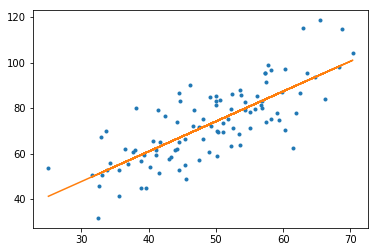

In [11]:
plt.plot(X, y, '.')
plt.plot(X, y2, '-')

In [8]:
# your turn .. fit Stochastic-Gradient-Descent using Scikit-learn!
# SGDRegressor
# Measure performance
# Validate results

# 6) Boston housing dataset using Scikit-Learn

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

In [3]:
# describe the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
# your turn!
# 

1. split data into training and test set (75-25 or 80-20)
2. fit Linear Regression : median value vs RM (average number of rooms)
3. fit Linear Regression : median value vs all features 
4. measure performance